In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#plt.style.use(r'C:\Users\Will\.matplotlib\stylelib\test.mplstyle')
%matplotlib inline

In [2]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_epochs=10, printing=False):
        
        """Initializes Adaline Perceptron class with learning rate and number of iterations
        """
        self.eta = eta  #Initialize learning rate
        self.n_epochs = n_epochs #Initialize number of epochs
        self.printing = printing #Initialize printing options
        
    def fit(self, X, y):
    
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          :Training vectors, where n_samples is the number of samples and n_features is the number of features.
        
        y : array-like, shape = [n_samples]
          :Target values
        
        Returns
        -------
        self : object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])  #initialize the weights ('w_') to zero
        self.cost_ = []  #for storing cost of each epoch
        self.score_ = [] #for storing score of each epoch
        
        #For each epoch...
        for i in range(1,n_epochs+1):
            output = self.net_input(X) #Output is net input of X and w_
            errors = (y - output) #Error is the difference between actual classes y and output (w.T * x)  #NOTE ORDER?

            cost = (errors**2).sum() / 2  #Objective cost function J(x): Sum-Squared Error 
            self.cost_.append(cost) #append epoch cost to cost_

            #Update weights with Gradient Descent
            gradient = self.gradient(X,errors) #Calculate gradient vector; vector of partial derivative of J(w) with respect to each weight
            self.w_[1:] += self.eta * gradient #Update feature weights
            self.w_[0] += self.eta * errors.sum() #Update model bias
            
            #Score model after epoch
            score = self.score(X, y)
            self.score_.append(score) #record epoch score

            #If printing=True, print results for each epoch
            if self.printing:
                print 'Epoch', i, score, self.w_, cost

        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #Dot product of the training set and fitted weights, plus fitted weight-zero
    
    def gradient(self, X, errors):
        """Compute the gradient vector; vector of partial derivative of J(w) with respect to each weight"""
        return X.T.dot(errors)
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
        
    def score(self, X, y):
        """Score the model --> Actual vs Predicted Classes"""
        predicts = self.predict(X)
        results = np.equal(predicts,y)
        correct = np.sum(results)
        score = float(correct) / float(len(results))
        return score          

In [3]:
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_epochs=10, _shuffle=True, printing=False):
        
        """Initializes Adaline Perceptron class with learning rate and number of iterations
        """
        self.eta = eta  #Initialize learning rate
        self.n_epochs = n_epochs #Initialize number of epochs
        self.shuffle = _shuffle #Initialize shuffle
        self.printing = printing #Initialize printing options
        
    def fit(self, X, y):
    
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          :Training vectors, where n_samples is the number of samples and n_features is the number of features.
        
        y : array-like, shape = [n_samples]
          :Target values
        
        Returns
        -------
        self : object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])  #initialize the weights ('w_') to zero
        self.cost_ = []  #for storing cost of each epoch
        self.score_ = [] #for storing score of each epoch
        
        #For each epoch...
        for i in range(1,n_epochs+1):
            
            sample_cost = [] #for storing cost of sample instance
            
            #SGD requires that the training data is shuffled
            if self._shuffle:
                X, y = self._shuffle(X, y)            
            
            #For each sample instance xi...    Stochastic Gradient Descent runs model/updates weights for every sample instance xi
            for xi, yi in zip(X,y):
                
                #Compute output and error for xi
                output = self.net_input(xi) #Output is net input of xi and w_
                errors = (yi - output) #Error is the difference between actual class yi and predicted class of xi (w.T * x)  #NOTE ORDER?

                #Compute cost of sample xi
                cost = (errors**2).sum() / 2  #Objective cost function J(x): Sum-Squared Error 
                sample_cost.append(cost) #append sample cost to sample_cost

                #Update weights with Gradient Descent
                gradient = self.gradient(xi,errors) #Calculate gradient vector; vector of partial derivative of J(w) with respect to each weight
                self.w_[1:] += self.eta * gradient #Update feature weights
                self.w_[0] += self.eta * errors.sum() #Update model bias

            #Calculate average cost of epoch
            avg_cost = sum(sample_cost)/len(sample_cost)
            self.cost_.append(avg_cost)
            
            #Score model after epoch
            score = self.score(X, y)
            self.score_.append(score) #record epoch score

            #If printing=True, print results for each epoch
            if self.printing:
                print 'Epoch', i, score, self.w_, cost

        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #Dot product of the training set and fitted weights, plus fitted weight-zero
    
    def gradient(self, X, errors):
        """Compute the gradient vector; vector of partial derivative of J(w) with respect to each weight"""
        return X.T.dot(errors)
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
        
    def score(self, X, y):
        """Score the model --> Actual vs Predicted Classes"""
        predicts = self.predict(X)
        results = np.equal(predicts,y)
        correct = np.sum(results)
        score = float(correct) / float(len(results))
        return score          
    
    def _shuffle(self,X,y):
        "Shuffles the data"
        r = np.random.permutation(len(y))
        return X[r], y[r]

# Load and Preview the Data

In [4]:
#Import Iris dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

#Reduce dataset to two classes: Iris-setosa and Iris-versicolor
data = df[(df[4] == 'Iris-setosa') |(df[4] == 'Iris-versicolor')]

#Reduce dataset to two features and one target: sepal/petal length measurements and species
data = data[[0,2,4]]

#Define feature set
X = data[[0,2]].values

#Define target set
y = data[4].values

#Replace species name with numerical variable
y = np.where(y == 'Iris-setosa',-1,1)

# Run Model

In [5]:
n_epochs = 15

ada = AdalineGD(n_epochs=n_epochs, eta=0.0001, printing=False).fit(X,y)

#n_epochs = np.argmax(ada.score_)  #Epoch number that produced the max score

ada1 = AdalineSGD(n_epochs=n_epochs, eta=0.01, _shuffle=True, printing=False).fit(X,y) #Run again, stopping at 'optimal' n_epoch

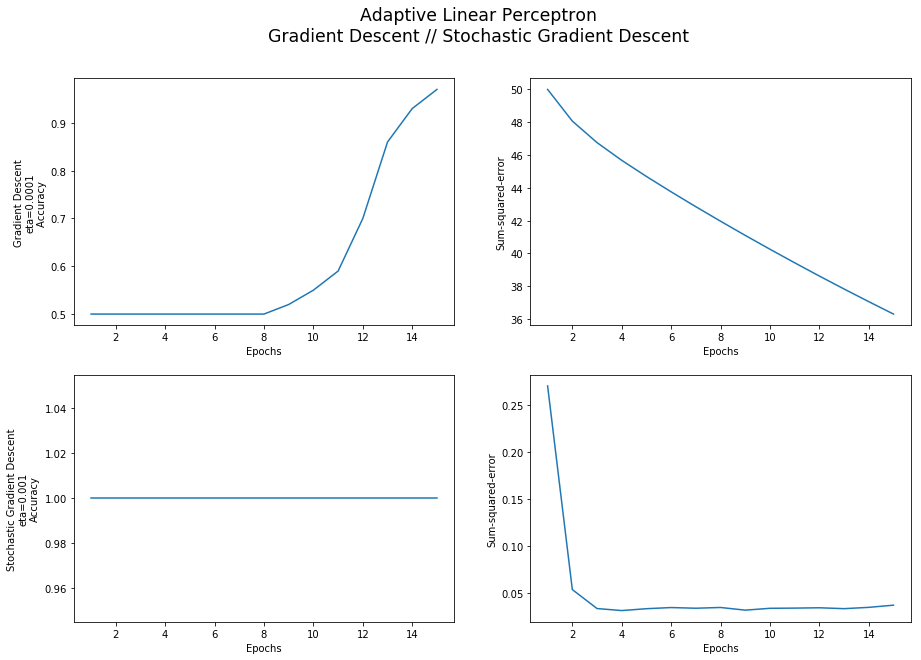

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

ax1.plot(range(1, len(ada.score_) + 1), ada.score_)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Gradient Descent\neta=0.0001\nAccuracy ')
ax1.set_title('')

ax2.plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Sum-squared-error')

ax3.plot(range(1, len(ada1.score_) + 1), ada1.score_)
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Stochastic Gradient Descent\neta=0.001\nAccuracy')

ax4.plot(range(1, len(ada1.cost_) + 1), ada1.cost_)
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Sum-squared-error')

sup = fig.suptitle('Adaptive Linear Perceptron\nGradient Descent // Stochastic Gradient Descent', fontsize="xx-large")

fig.savefig(r'C:\Users\Will\Desktop\GD v SDG.png')